# **Servo Prediction using Linear Regression**

## **Objective:-**
To predict the hand written digits and classify them using classification algorithm.

### **Data Source:-**
Imported from github repository of YBI foundation. Link-https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Servo%20Mechanism.csv

## **Data Description:**
The dataset consists of various 167 observations on 5 variables, 4 nominal and 1 as the target class. The data is form of simulation of servo system involving servo amplifier, a motor, a lead screw and a sliding carriage.

### **Import Library:**

In [1]:
import pandas as pd

In [2]:
import numpy as np

## **Import Dataset:**

In [3]:
url = 'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Servo%20Mechanism.csv'
df = pd.read_csv(url,encoding="ISO-8859-1")

### **Get Data info and first five rows:**

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [7]:
df.shape

(167, 5)

In [8]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


### **Get Categories and Counts of Values**

In [10]:
df[["Motor"]].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [11]:
df[["Screw"]].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

### **Getting Encoding of Categorical Features**

In [13]:
df.replace({'Motor':{'A':0,'B':1,'C':2, 'D':3, 'E':4}},inplace=True)

In [14]:
df.replace({'Screw':{'A':0,'B':1,'C':2, 'D':3, 'E':4}},inplace=True)

## **Define y and X**

In [15]:
y = df['Class']

In [16]:
y.shape

(167,)

In [17]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [18]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [19]:
X.shape

(167, 4)

In [20]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,3,3,6,5
2,3,3,4,3
3,3,0,3,2
4,3,1,6,5
...,...,...,...,...
162,3,2,3,2
163,3,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Model**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 2529)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

### **Train Model**

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

## **Model Prediction**

In [27]:
y_pred = lr.predict(X_test)

In [28]:
y_pred.shape

(51,)

In [29]:
y_pred

array([26.05732229, 32.10612371, 19.95717891, 25.35636734, 39.9467131 ,
       25.23732689, 12.4387691 , 20.70946126, 41.60307499, 41.85754152,
       10.78240721, 26.82597573, 18.30081703, 16.18159564, 23.51325196,
       22.2981101 , -3.926979  , 27.71368417, 32.68276982,  2.05410938,
       35.16438094, 32.42830329, 35.23209399, 30.70422836, 20.38728168,
        8.30604993, 29.95194601, 17.65120403, 22.11135661,  5.2477927 ,
       31.60830789, 20.77717431, 35.74102706, 29.04786647, 12.86887187,
        0.78764012, 20.38728168, 33.76248559, 14.27076721, 38.54481776,
       29.11557952, 19.05309938,  8.15425275,  9.81061463, 32.17383675,
       29.37004606, 30.7719414 ,  5.50225924, 24.02218503, 20.9639278 ,
       25.74625996])

### **Get Model Evaluation**

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
mean_squared_error(y_test, y_pred)

64.72490124349433

In [32]:
mean_absolute_error(y_test, y_pred)

6.79913481910578

In [33]:
r2_score(y_test, y_pred)

0.6870629962965525

## **Visualization of Actual Vs Predicted Results**

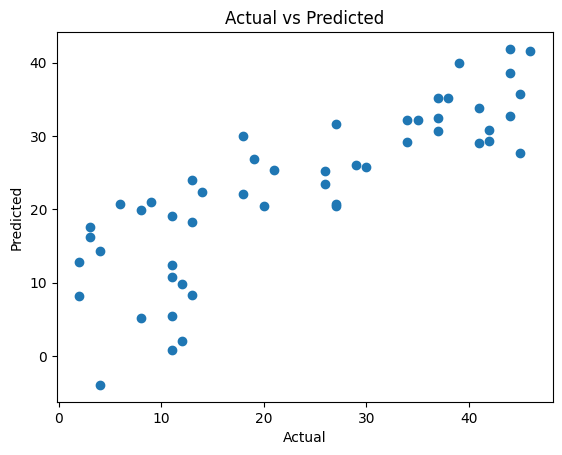

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# **Get Future Predictions**

**Select random sample from existing as new value**
**Steps:**
1.Extract random row
2.Seperate X and y
3.Standardize X
4.Predict

In [35]:
X_new = df.sample(1)

In [36]:
X_new

,Motor,Screw,Pgain,Vgain,Class
43,3,3,4,1,3


In [37]:
X_new.shape

(1, 5)

In [38]:
X_new = X_new.drop('Class', axis = 1)

In [39]:
X_new

,Motor,Screw,Pgain,Vgain
43,3,3,4,1


In [40]:
X_new.shape

(1, 4)

In [41]:
y_pred_new = lr.predict(X_new)

In [42]:
y_pred_new

array([11.21250998])

# **Conclusion:**
In this analysis, we used a dataset for servo mechanism. We used Linear Regression model for prediction of dataset. Also we predicted the output for new values input.For this analysis,    
1.Mean absolute error=6.79913481910578    
2.Mean Squared error=64.72490124349433   
3.r2 score=0.6870629962965525